<a href="https://colab.research.google.com/github/KevinEnriquez96/Proyecto-de-titulacion/blob/main/filtrosSe%C3%B1alesEEG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Librerias**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler


## **Señales EEG sin filtrar**

In [ ]:
df=pd.read_csv('Sujeto10.csv')

df.head(100)

,atencion,theta,low alp,high alp,low gamm,min gamm
0,48,49472,13772,3845,25612,15790
1,54,50516,8513,53167,12436,16725
2,44,41042,43106,14837,34141,9890
3,47,17292,7510,5781,2840,3960
4,54,53230,5052,21563,13359,14247
...,...,...,...,...,...,...
95,88,14818,3692,10711,7690,2126
96,88,20903,9557,6602,14728,23087
97,66,2060,4409,28488,23174,6894
98,47,56938,64516,13212,24506,22751


In [ ]:
x1 = df.values
xv = x1.reshape(300,6)
df1 = pd.DataFrame(xv)


## **Gráfica de señales**

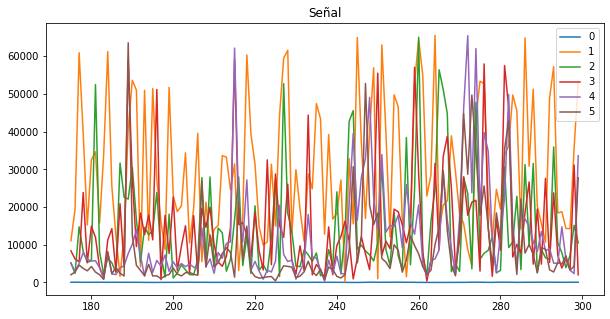

In [ ]:
df1[175:350].plot(figsize=(10,5))
#f[2000:4000].plot(figsize=(10,5))
plt.title('Señal')
plt.legend(loc='best')

## **Análisis de datos**

In [ ]:
signal1=df['atencion']
signal2=df['theta ']
signal3=df['low alp']
signal4=df['high alp ']
signal5=df['low gamm']
signal6=df['min gamm ']
#df1=df.drop(['TIME','EMG2','EMG3'],axis=1)
#df2=df.drop(['TIME','EMG1','EMG3'],axis=1)
#df3=df.drop(['TIME','EMG1','EMG2'],axis=1)

df1=df.drop(['theta ','low alp','high alp '],axis=1)
df2=df.drop(['atencion','low alp','high alp '],axis=1)
df3=df.drop(['atencion','theta ','high alp '],axis=1)
df4=df.drop(['atencion','theta ','low alp'],axis=1)
df5=df.drop(['atencion','theta ','high alp ','min gamm '],axis=1)
df6=df.drop(['atencion','theta ','low alp','low gamm'],axis=1)

In [ ]:
df[:500].describe()

,atencion,theta,low alp,high alp,low gamm,min gamm
count,300.000000,300.000000,300.000000,300.000000,300.00000,300.000000
mean,48.983333,28539.323333,12768.266667,13104.600000,10961.43000,7889.506667
std,17.741069,17101.182066,13116.517577,11906.564483,10894.91565,9560.446625
min,4.000000,133.000000,637.000000,342.000000,200.00000,181.000000
25%,38.000000,15018.000000,4494.750000,5233.000000,3868.00000,2684.000000
50%,48.000000,24745.500000,7803.500000,9483.000000,6970.00000,4531.000000
75%,61.000000,40879.250000,14790.250000,17704.250000,14151.50000,9238.750000
max,93.000000,65509.000000,65048.000000,64792.000000,65432.00000,63544.000000


## **Graficas de señales sin filtrar**

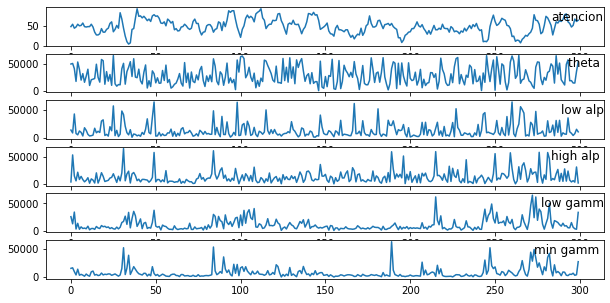

In [ ]:
groups = [0,1,2,3,4,5]
i = 1
# plot each column
plt.figure(figsize=(10,5))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(df.values[:, group])
	plt.title(df.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

## **Filtro - Media movil**

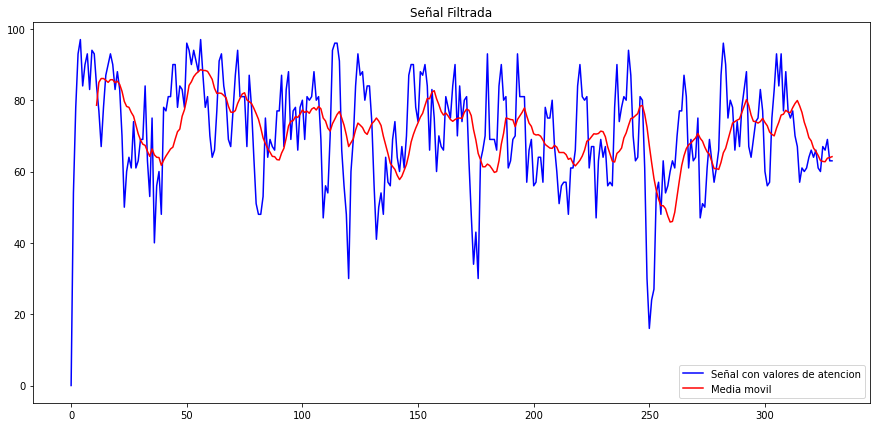

In [ ]:
moving_avg1 = pd.Series(signal1).rolling(window=12).mean()
moving_avg2 = pd.Series(signal2).rolling(window=12).mean()
moving_avg3 = pd.Series(signal3).rolling(window=12).mean()
moving_avg4 = pd.Series(signal4).rolling(window=12).mean()
moving_avg5 = pd.Series(signal5).rolling(window=12).mean()
moving_avg6 = pd.Series(signal6).rolling(window=12).mean()
  

signal1[:500].plot(figsize=(15,7),label='Señal con valores de atencion',color='blue')
moving_avg1[:500].plot(label='Media movil',color='red')
plt.title('Señal Filtrada')
plt.legend(loc='best')



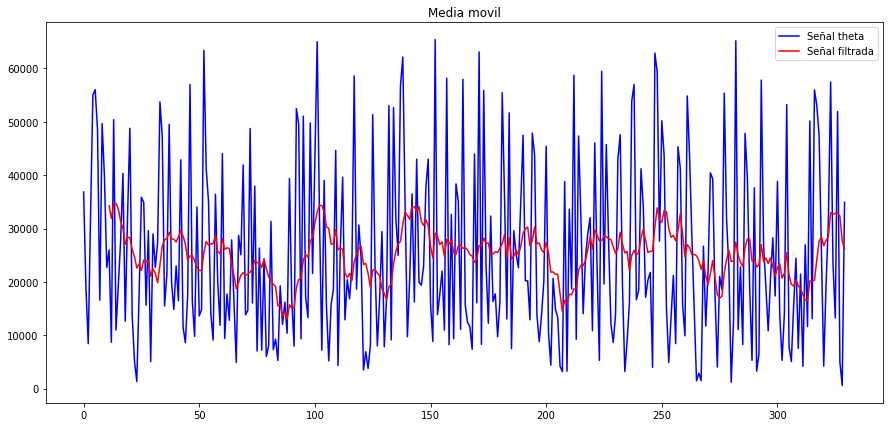

In [ ]:
signal2[:500].plot(figsize=(15,7),label='Señal theta',color='blue')
moving_avg2[:500].plot(label='Señal filtrada',color='red')
plt.title('Media movil')
plt.legend(loc='best')

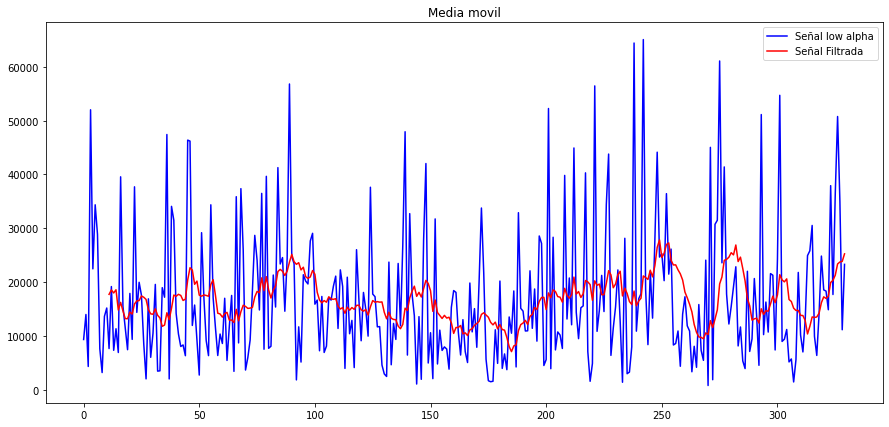

In [ ]:
signal3[:500].plot(figsize=(15,7),label='Señal low alpha',color='blue')
moving_avg3[:500].plot(label='Señal Filtrada',color='red')
plt.title('Media movil')
plt.legend(loc='best')


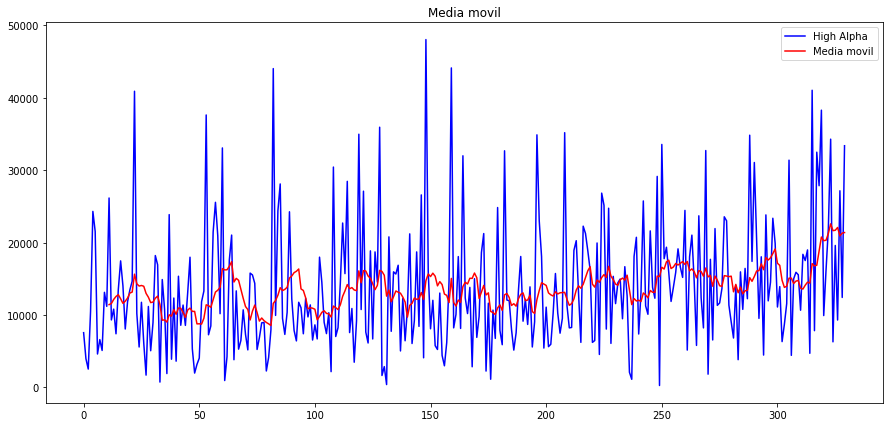

In [ ]:
signal4[:500].plot(figsize=(15,7),label='High Alpha',color='blue')
moving_avg4.plot(label='Señal filtrada',color='red')
plt.title('Media movil')
plt.legend(loc='best')

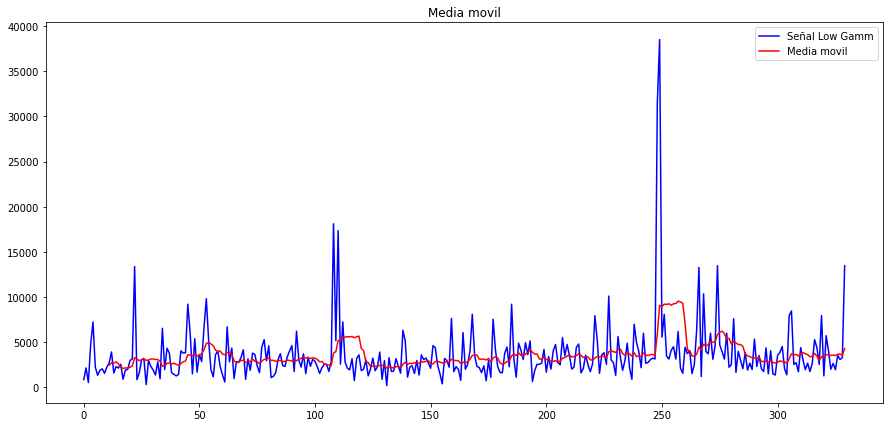

In [ ]:

signal5[:500].plot(figsize=(15,7),label='Señal Low Gamm',color='blue')
moving_avg5.plot(label='Señal filtrada',color='red')
plt.title('Media movil')
plt.legend(loc='best')

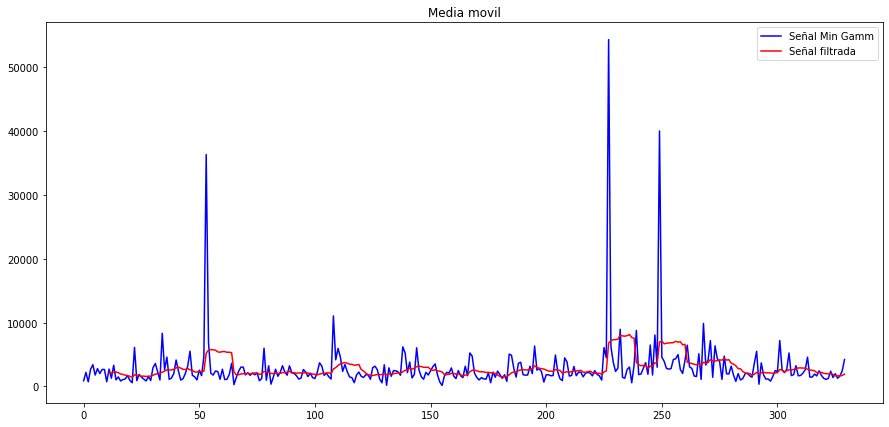

In [ ]:
signal6[:500].plot(figsize=(15,7),label='Señal Min Gamm',color='blue')
moving_avg6.plot(label='Señal filtrada',color='red')
plt.title('Media movil')
plt.legend(loc='best')

## **Impresion de resultados con las señales filtradas con el filtro media movil**

In [ ]:
df5=pd.DataFrame()
df5['atencion']=moving_avg1
df5['theta']=moving_avg2
df5['low alp']=moving_avg3
df5['high alp']=moving_avg4
df5['low gamm']=moving_avg5
df6['high gamm ']=moving_avg6
df5[30:50].head()
#Genera una matrix nueva
df5.to_csv('MediaMovil3.csv')
df5.describe()

,atencion,theta,low alp,high alp,low gamm
count,319.000000,319.000000,319.000000,319.000000,319.000000
mean,71.383751,25174.363114,16768.615465,13696.135841,3597.483281
std,7.918068,4394.809116,3987.433008,2623.199940,1352.414658
min,45.833333,13034.583333,7071.250000,8542.250000,2107.750000
25%,65.666667,22257.583333,13924.000000,11876.416667,2860.625000
50%,72.166667,25493.666667,16556.916667,13440.500000,3255.083333
75%,76.583333,27890.666667,19527.958333,15303.083333,3723.041667
max,88.583333,34729.833333,27829.666667,22587.083333,9547.583333


## **Filtro - Savitzky golay**

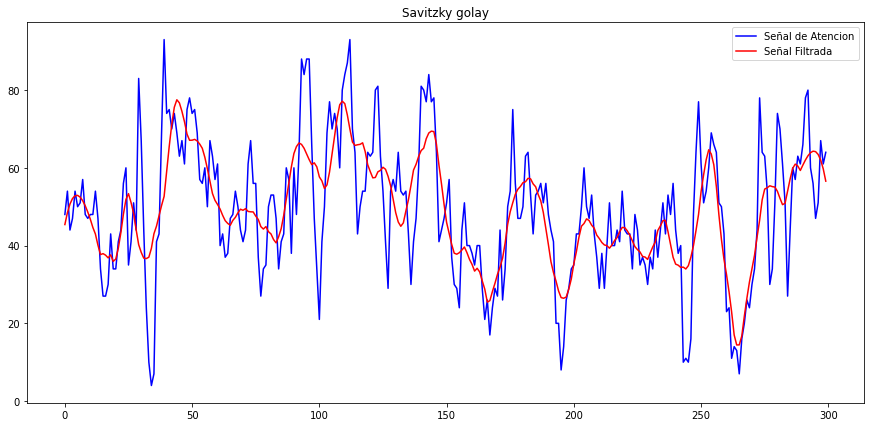

In [ ]:

from scipy.signal import savgol_filter
np.set_printoptions(precision=2) 

SG1=savgol_filter(signal1, 21, 3)
df1['atencion']=SG1
SG2=savgol_filter(signal2, 21, 3)
df2['theta']=SG2
SG3=savgol_filter(signal3, 21, 3)
df3['low alp']=SG3
SG4=savgol_filter(signal4, 21, 3)
df4['high alp']=SG4
SG5=savgol_filter(signal5, 21, 3)
df5['low gamm']=SG5
SG6=savgol_filter(signal6, 21, 3)
df6['min gamm ']=SG6

signal1[:500].plot(figsize=(15,7),label='Señal de Atencion',color='blue')
df1['atencion'][:500].plot(label='Señal Filtrada',color='red')
plt.title('Savitzky golay')
plt.legend(loc='best')



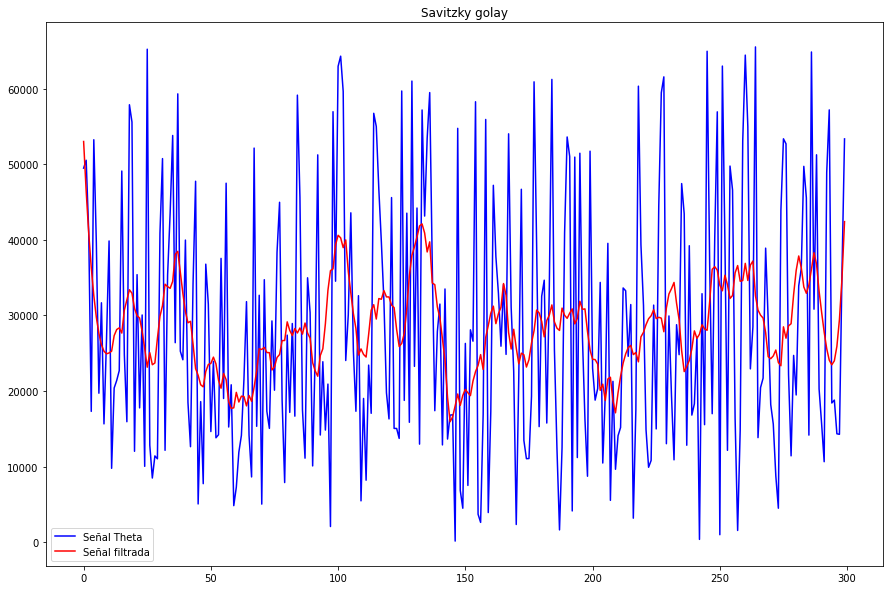

In [ ]:
signal2.plot(figsize=(15,10),label='Señal Theta',color='blue')
df2['theta'].plot(label='Señal filtrada',color='red')
plt.title('Savitzky golay')
plt.legend(loc='best')


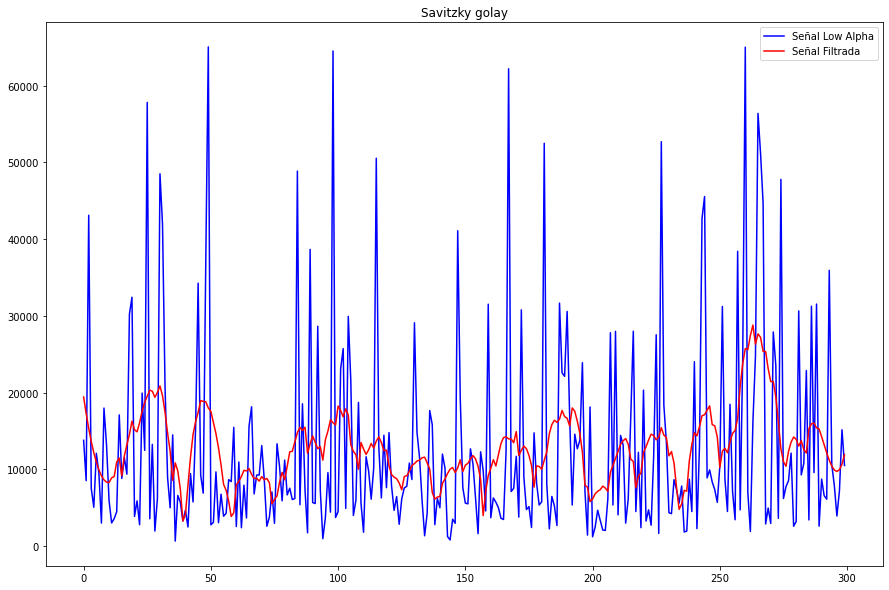

In [ ]:

variable_name = ""
#df3['SG3'][:500].plot(figsize=(25,10),color='violet')
signal3[:500].plot(figsize=(15,10),label='Señal Low Alpha',color='blue')
df3['low alp'][:500].plot(label='Señal Filtrada',color='red')
plt.title('Savitzky golay')
plt.legend(loc='best')

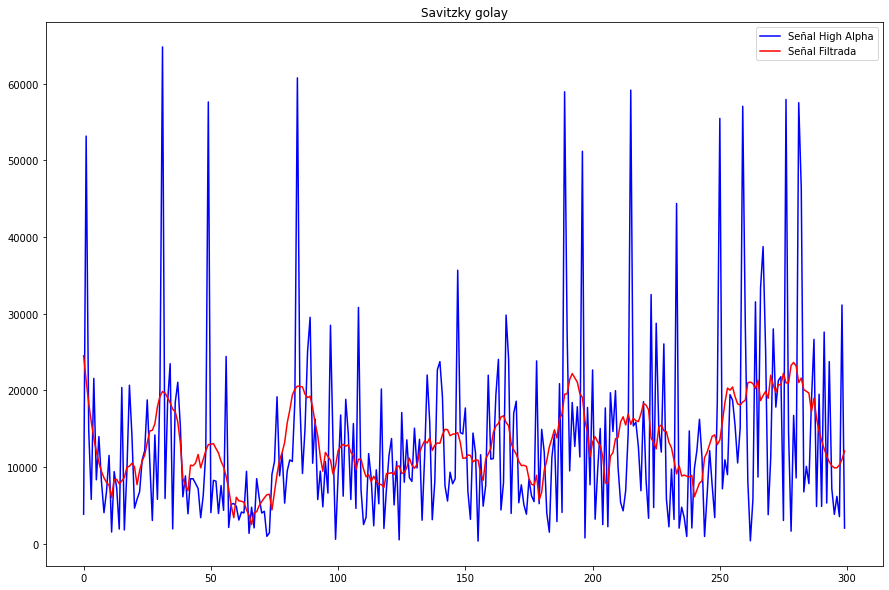

In [ ]:

signal4[:500].plot(figsize=(15,10),label='Señal High Alpha',color='blue')
df4['high alp'][:500].plot(label='Señal Filtrada',color='red')
plt.title('Savitzky golay')
plt.legend(loc='best')

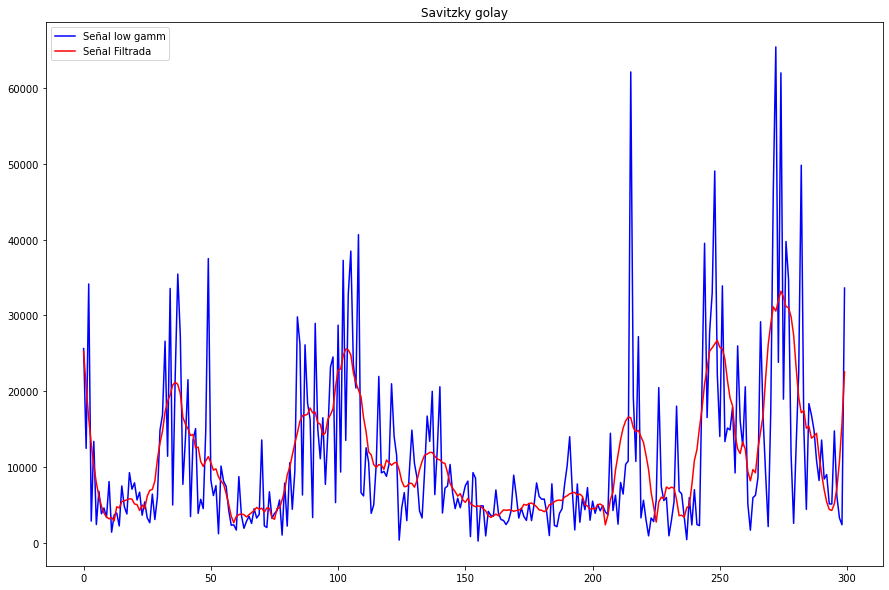

In [ ]:
variable_name = ""
signal5[:500].plot(figsize=(15,10),label='Señal low gamm',color='blue')
df5['low gamm'][:500].plot(label='Señal Filtrada',color='red')
plt.title('Savitzky golay')
plt.legend(loc='best')

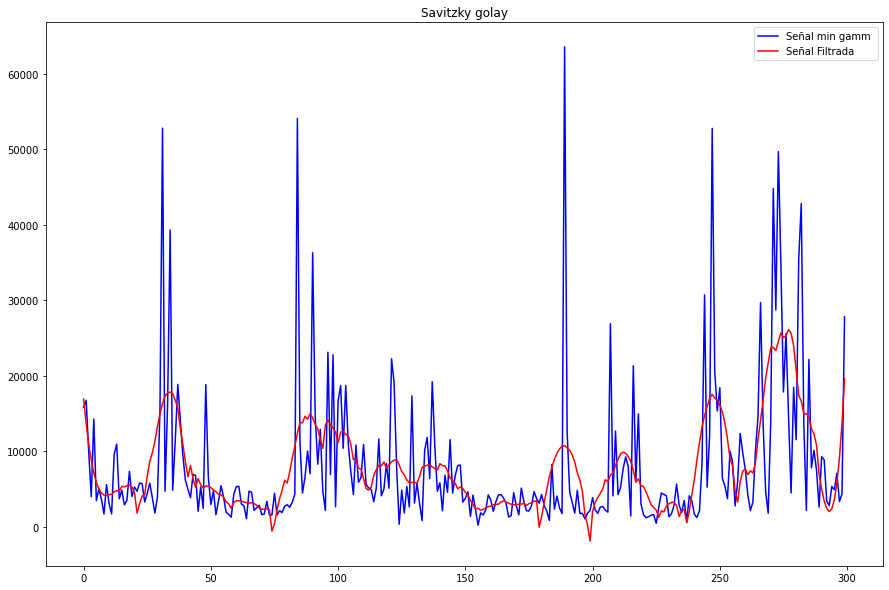

In [ ]:
variable_name = ""
#df4['SG4'][:500].plot(figsize=(25,10),color='violet')
signal6[:500].plot(figsize=(15,10),label='Señal min gamm ',color='blue')
df6['min gamm '][:500].plot(label='Señal Filtrada',color='red')
plt.title('Savitzky golay')
plt.legend(loc='best')

## **Impresion de resultados con las señales filtradas con el filtro Savitzky Golay**

In [ ]:

df5=pd.DataFrame()
df5['atencion']=SG1
df5['theta']=SG2
df5['low alp']=SG3
df5['high alp']=SG4
df5['low gamm']=SG5
df5['min gamm ']=SG6
df5[30:50].head()
#Genera una matrix nueva
df5.to_csv('Sujeto10Filtrado.csv')
df5.describe()

,atencion,theta,low alp,high alp,low gamm,min gamm
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,49.009203,28495.372268,12757.427855,13096.527323,10928.685123,7865.458721
std,12.542335,5825.626497,4465.413476,4664.959500,7156.758891,5530.311601
min,14.427591,15923.742399,3254.491991,2511.935273,2350.779993,-1930.819876
25%,39.984390,24478.959137,9717.794112,9808.030402,5014.252370,3405.152256
50%,48.390651,28139.186499,12322.347826,12474.203988,9218.549363,6341.645636
75%,58.992073,32220.716165,15076.919582,16358.181268,15092.319631,10670.682658
max,77.514220,52994.732731,28792.621118,24512.547525,33180.202681,26096.085649


## **Filtro** FIR

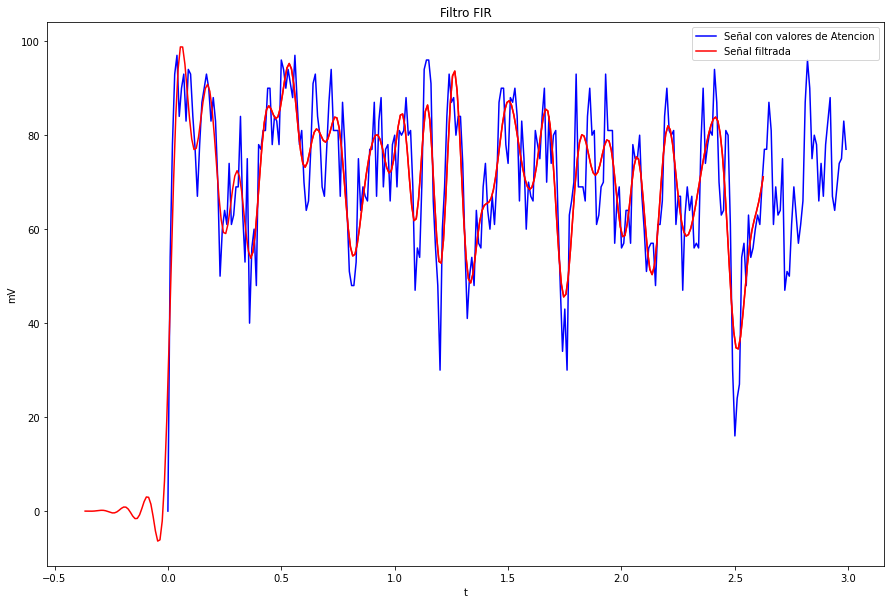

In [ ]:
from numpy import pi, absolute, arange
from scipy.signal import kaiserord, lfilter, firwin, freqz
from pylab import figure, plot, xlabel, ylabel, title, show, get_figlabels
from pylab import *
import matplotlib
from matplotlib import pylab, mlab, pyplot

sample_rate = 100.0
nsamples = 300
t = arange(nsamples) / sample_rate

#------------------------------------------------
# Crear un filtro FIR y aplicarlo a x.
#------------------------------------------------
# La tasa de Nyquist de la señal.
nyq_rate = sample_rate / 2.0

# La anchura deseada de la transición de paso a parada,
# relativa a la tasa de Nyquist.  Diseñaremos el filtro
# con un ancho de transición de 5 Hz.
width = 5.0/nyq_rate
# La atenuación deseada en la banda de parada, en dB.
ripple_db = 60.0
# Calcula el orden y el parámetro Kaiser para el filtro FIR
N, beta = kaiserord(ripple_db, width)
# La frecuencia de corte del filtro.
cutoff_hz = 10.0
# Utiliza firwin con una ventana Kaiser para crear un filtro FIR de paso bajo.
taps = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))
# Usa lfilter para filtrar x con el filtro FIR.
filtered_x = lfilter(taps, 1.0, signal1)
df1['FIR1']=filtered_x
#------------------------------------------------
# Traza las señales original y filtrada.
#------------------------------------------------
filtered_x =filtered_x 
# El retardo de fase de la señal filtrada.
delay = 0.5 * (N-1) / sample_rate

figure(figsize=(15,10))
# Traza la señal original.
plot(t, signal1[:300],color='blue')
# Traza la señal filtrada, desplazada para compensar el retardo de fase.
plot(t-delay, filtered_x[:300],color='red')
# Traza sólo la parte "buena" de la señal filtrada.  Las primeras N-1
# están "corrompidas" por las condiciones iniciales.
plot(t[N-1:]-delay, filtered_x[N-1:][:227], color='red')
ylabel('mV')
xlabel('t')
title('Filtro FIR')
legend(('Señal con valores de Atencion', 'Señal filtrada'),
prop = {'size': 10}, loc='upper right')
show()


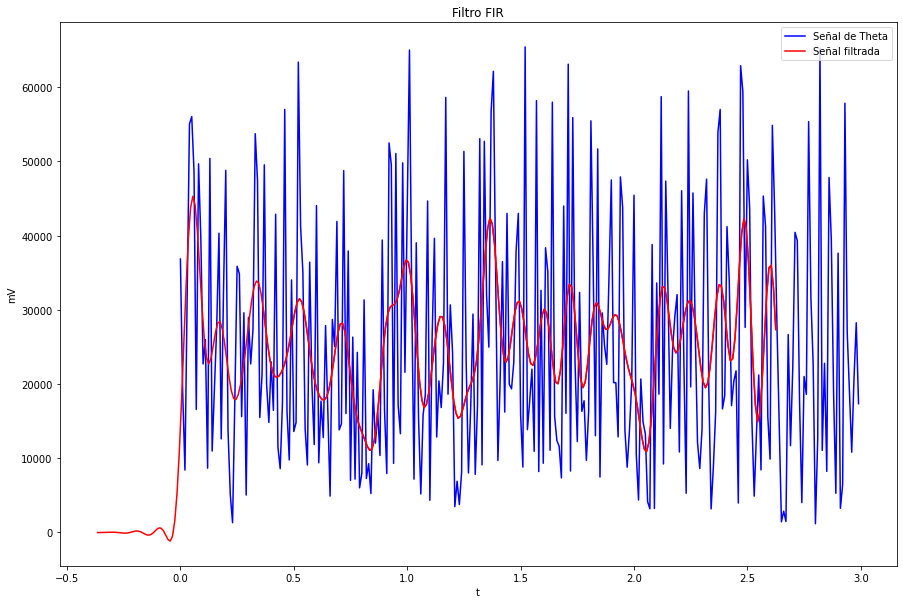

In [ ]:

filtered_x = lfilter(taps, 1.0, signal2)
df2['FIR2']=filtered_x
filtered_x =filtered_x 
delay = 0.5 * (N-1) / sample_rate
figure(figsize=(15,10))
plot(t, signal2[:300],color='blue')
plot(t-delay, filtered_x[:300],color='red')
plot(t[N-1:]-delay, filtered_x[N-1:][:227], color='red')
ylabel('mV')
xlabel('t')
title('Filtro FIR')
legend(('Señal de Theta', 'Señal filtrada'),
prop = {'size': 10}, loc='upper right')
show()

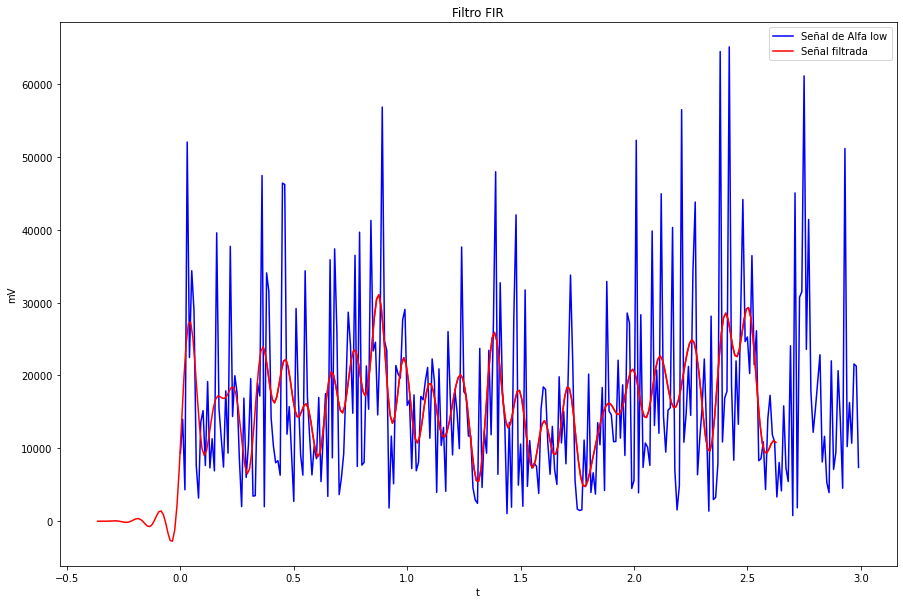

In [ ]:

filtered_x = lfilter(taps, 1.0, signal3)
df3['FIR3']=filtered_x
filtered_x =filtered_x 
delay = 0.5 * (N-1) / sample_rate
figure(figsize=(15,10))
plot(t, signal3[:300],color='blue')
plot(t-delay, filtered_x[:300],color='red')
plot(t[N-1:]-delay, filtered_x[N-1:][:227], color='red')
ylabel('mV')
xlabel('t')
title('Filtro FIR')
legend(('Señal de Alfa low', 'Señal filtrada'),
prop = {'size': 10}, loc='upper right')
show()

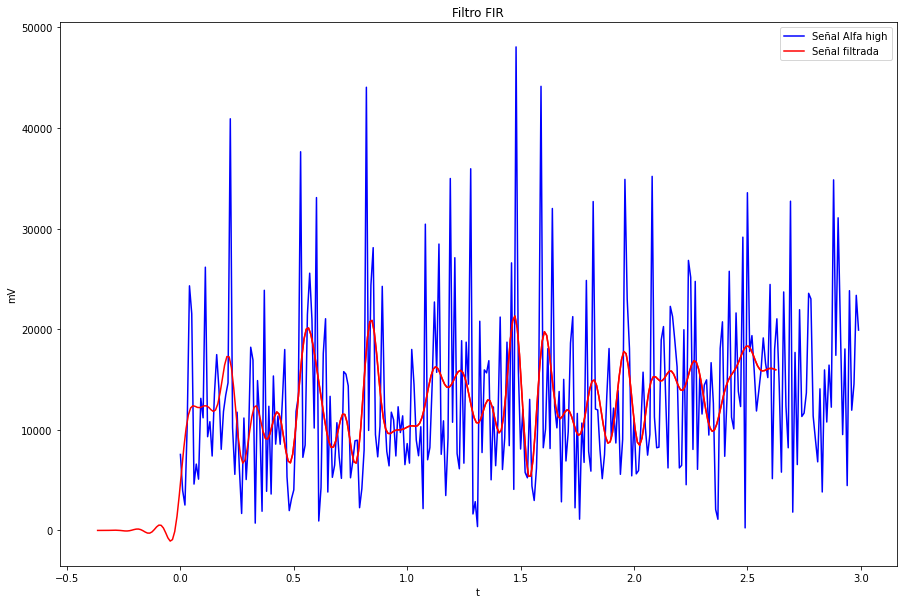

In [ ]:

filtered_x = lfilter(taps, 1.0, signal4)
df4['FIR4']=filtered_x
filtered_x =filtered_x 
delay = 0.5 * (N-1) / sample_rate
figure(figsize=(15,10))
plot(t, signal4[:300],color='blue')
plot(t-delay, filtered_x[:300],color='red')
plot(t[N-1:]-delay, filtered_x[N-1:][:227], color='red')
ylabel('mV')
xlabel('t')
title('Filtro FIR')
legend(('Señal Alfa high', 'Señal filtrada'),
prop = {'size': 10}, loc='upper right')
show()

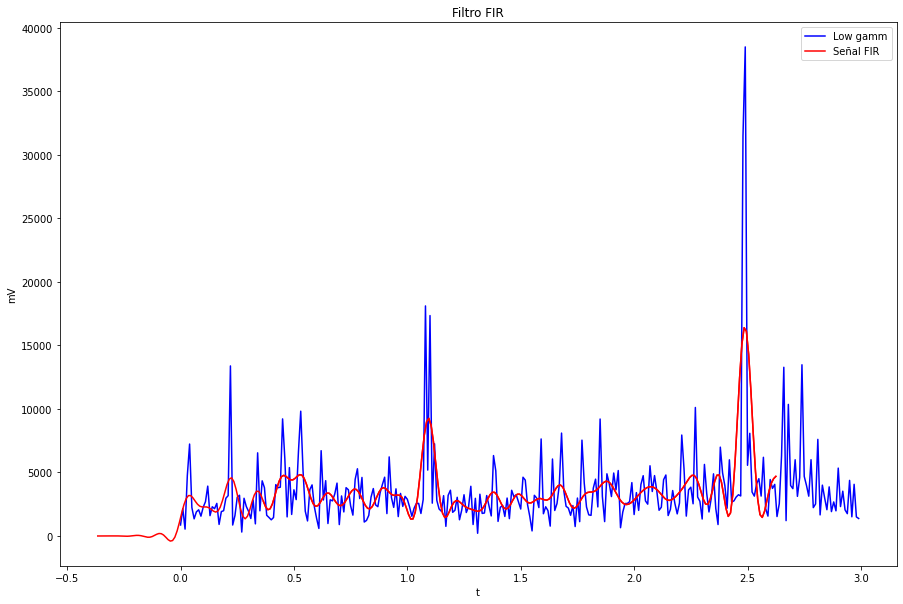

In [ ]:

filtered_x = lfilter(taps, 1.0, signal5)
df5['FIR5']=filtered_x
filtered_x =filtered_x 
delay = 0.5 * (N-1) / sample_rate

figure(figsize=(15,10))
plot(t, signal5[:300],color='blue')
plot(t-delay, filtered_x[:300],color='red')
plot(t[N-1:]-delay, filtered_x[N-1:][:227], color='red')
ylabel('mV')
xlabel('t')
title('Filtro FIR')
legend(('Seña Low gamm', 'Señal filtrada'),
prop = {'size': 10}, loc='upper right')
show()

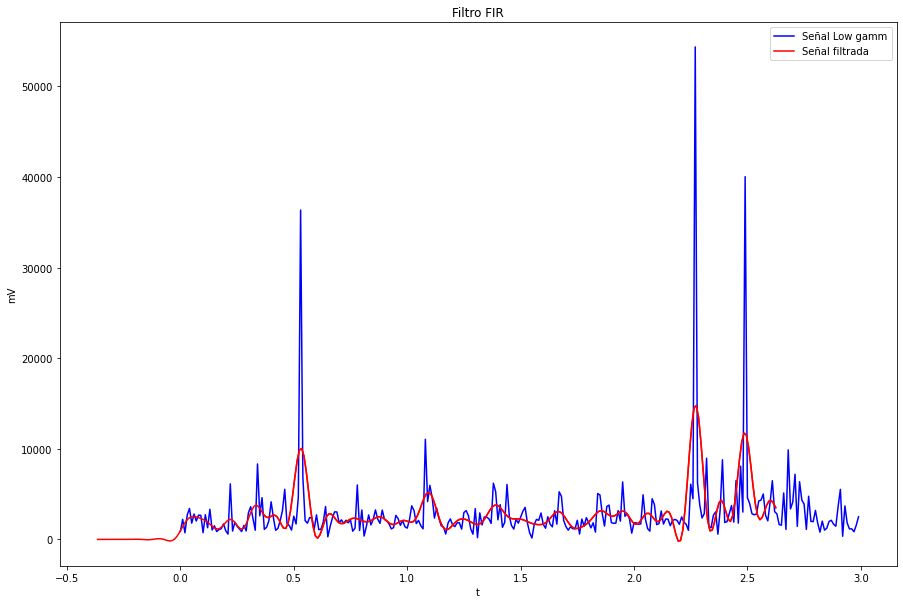

In [ ]:

filtered_x = lfilter(taps, 1.0, signal6)
df6['FIR6']=filtered_x

filtered_x =filtered_x 
delay = 0.5 * (N-1) / sample_rate

figure(figsize=(15,10))
plot(t, signal6[:300],color='blue')
plot(t-delay, filtered_x[:300],color='red')
plot(t[N-1:]-delay, filtered_x[N-1:][:227], color='red')
ylabel('mV')
xlabel('t')
title('Filtro FIR')
legend(('Señal Low gamm', 'Señal filtrada'),
prop = {'size': 10}, loc='upper right')
show()

## **Impresion de resultados con las señales filtradas con el filtro FIR**

In [ ]:
df11=pd.DataFrame()
df11['atencion']=df1['FIR1']
df11['theta']=df2['FIR2']
df11['Alfa low']=df3['FIR3']
df11['Alfa high']=df4['FIR4']
df11['low gamm']=df5['FIR5']
df11['min gamm ']=df6['FIR6']
df11.to_csv('FIR3.csv')
df11.describe()

,atencion,theta,Alfa low,Alfa high,low gamm,min gamm
count,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,63.437295,22627.677672,14899.334221,11773.078479,3198.187450,2639.726285
std,25.309479,10145.339279,7705.631975,5295.753696,2221.629505,2329.678822
min,-6.381544,-1158.442085,-2725.579766,-1060.624825,-401.887170,-185.991589
25%,58.451773,18846.263724,10297.751567,9799.065656,2287.483710,1648.458073
50%,71.417022,24207.118654,15638.067359,12235.000883,2965.040751,2219.729341
75%,79.208197,29075.392277,19533.665857,15531.416776,3784.489062,2977.027902
max,98.787980,45306.586957,34910.954138,22453.078473,16395.908400,14777.844080
